1.Write a randomizer program that selectively randomizes a percentage of the wheat seed features (a cell -- not a column or row).

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [50]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
path = '/content/seeds_dataset.txt'

--2023-02-28 05:15:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt.1’

seeds_dataset.txt.1 100%[===================>]   9.08K  --.-KB/s    in 0s      

2023-02-28 05:15:59 (83.5 MB/s) - ‘seeds_dataset.txt.1’ saved [9300/9300]



In [51]:
features = ['Area',
            'Perimeter',
            'Compactness',
            'Length of kernel',
            'Width of kernel',
            'Asymmetry coefficient',
            'Length of kernel groove.']

df = pd.read_csv(path, delimiter=r'[\t]+',
                 names=features + ['target'])
display(df)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove.,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # X = X.to_numpy()
    # y = y.to_numpy()
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set') 

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.1, random_state=42)


In [ ]:
import numpy as np

def randomize_wheat_seed_features(X, percentage):
    """
    Randomly selects a percentage of the wheat seed features (a cell) and randomizes their values.

    Parameters:
        X (numpy.ndarray): The input feature matrix of shape (n_samples, n_features).
        percentage (float): The percentage of cells to randomize, in the range [0, 1].

    Returns:
        X_randomized (numpy.ndarray): The randomized feature matrix of the same shape as X.
    """

    # Make a copy of the input feature matrix
    X_randomized = np.copy(X)

    # Compute the total number of cells in the feature matrix
    total_cells = X.shape[0] * X.shape[1]

    # Compute the number of cells to randomize
    num_cells_to_randomize = int(total_cells * percentage)

    # Randomly select the indices of the cells to randomize
    cell_indices = np.random.choice(total_cells, size=num_cells_to_randomize, replace=False)

    # Randomly set the values of the selected cells
    for cell_index in cell_indices:
        row_index = cell_index // X.shape[1]
        col_index = cell_index % X.shape[1]
        X_randomized[row_index, col_index] = np.random.rand()

    return X_randomized


# Load the dataset
data = np.loadtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt')

# Split the dataset into features and labels
X = data[:, :-1]

# Print the original feature matrix
print("Original feature matrix:")
print(X)

# Randomize 10% of the cells
X_randomized = randomize_wheat_seed_features(X, percentage=0.1)

# Print the randomized feature matrix
print("Randomized feature matrix:")
print(X_randomized)


Original feature matrix:
[[15.26   14.84    0.871  ...  3.312   2.221   5.22  ]
 [14.88   14.57    0.8811 ...  3.333   1.018   4.956 ]
 [14.29   14.09    0.905  ...  3.337   2.699   4.825 ]
 ...
 [13.2    13.66    0.8883 ...  3.232   8.315   5.056 ]
 [11.84   13.21    0.8521 ...  2.836   3.598   5.044 ]
 [12.3    13.34    0.8684 ...  2.974   5.637   5.063 ]]
Randomized feature matrix:
[[15.26       14.84        0.871      ...  3.312       2.221
   5.22      ]
 [14.88        0.59624201  0.18126335 ...  3.333       1.018
   4.956     ]
 [14.29       14.09        0.905      ...  3.337       2.699
   4.825     ]
 ...
 [ 0.61677658 13.66        0.8883     ...  3.232       8.315
   5.056     ]
 [11.84       13.21        0.8521     ...  2.836       3.598
   5.044     ]
 [12.3        13.34        0.8684     ...  2.974       5.637
   5.063     ]]


In [ ]:
# Select a percentage of features to randomize
percent_to_randomize = 0.1
num_features_to_randomize = int(percent_to_randomize * df.shape[1])

# Randomly select cells to be randomized
random_rows = np.random.choice(df.index, size=num_features_to_randomize)
random_cols = np.random.choice(df.columns[:-1], size=num_features_to_randomize)

# Create a copy of the original dataframe
df_randomized = df.copy()

# Randomize the selected cells
for i, row in enumerate(random_rows):
    col = random_cols[i]
    df_randomized.at[row, col] = np.random.uniform(low=df[col].min(), high=df[col].max())

# Separate features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Separate randomized features and target variable
X_randomized = df_randomized.iloc[:, :-1]

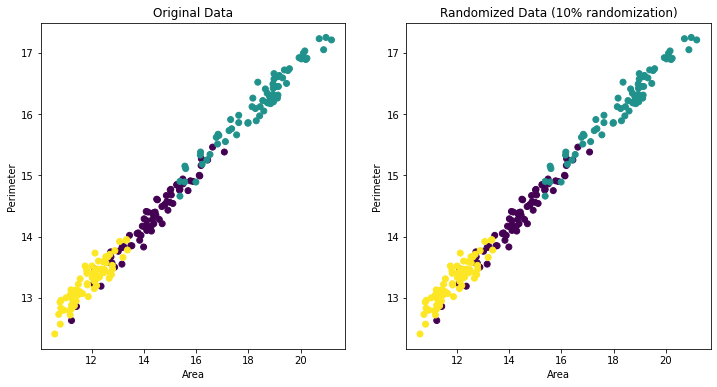

In [ ]:
# Plot the original and randomized data
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
axs[0].set_xlabel("Area")
axs[0].set_ylabel("Perimeter")
axs[0].set_title("Original Data")
axs[1].scatter(X_randomized.iloc[:, 0], X_randomized.iloc[:, 1], c=y)
axs[1].set_xlabel("Area")
axs[1].set_ylabel("Perimeter")
axs[1].set_title("Randomized Data ({}% randomization)".format(int(percent_to_randomize * 100)))
plt.show()

In [ ]:
data=np.loadtxt("seeds_dataset.txt")
print(data)

[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]


#2.Select a learning algorithm or algorithms and use the imputing solutions from scikit learn to compare results from the unaffected original data.

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove"]
df = pd.read_csv(url, delimiter=r'[\t]+', names=columns+['species'])
df.head()


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,area,perimeter,compactness,length,width,asymmetry,groove,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [79]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.1, random_state=42)


In [81]:
from sklearn.impute import SimpleImputer

# Create imputer object with default parameters
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

In [89]:
lr = LogisticRegression(multi_class='ovr',random_state=1, solver='lbfgs')
lr.fit(X_train_imputed[:,:2],y_train.values)

LogisticRegression(multi_class='ovr', random_state=1)

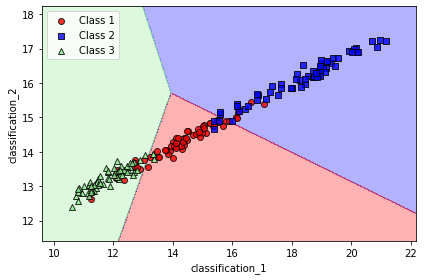

In [90]:
plot_decision_regions(X_train_imputed[:,:2],y_train.values, classifier=lr)

plt.xlabel('classification_1')
plt.ylabel('classification_2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
     

In [91]:
lr = LogisticRegression(multi_class='ovr',random_state=1, solver='lbfgs')
lr.fit(X_test_imputed[:,:2],y_test.values)

LogisticRegression(multi_class='ovr', random_state=1)

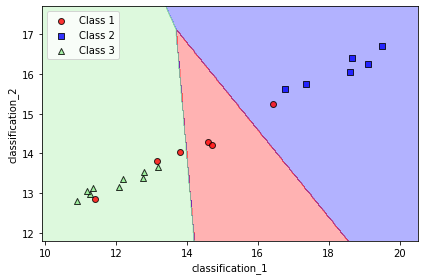

In [92]:
plot_decision_regions(X_test_imputed[:,:2],y_test.values, classifier=lr)

plt.xlabel('classification_1')
plt.ylabel('classification_2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [93]:
y_pred_imputed=lr.predict(X_test_imputed[:,[0,1]])
accuracy_imputed=accuracy_score(y_test,y_pred_imputed)
print("accuracy= ",accuracy_imputed)

accuracy=  0.8095238095238095


In [94]:
lr = LogisticRegression(multi_class='ovr',random_state=1, solver='lbfgs')
lr.fit(X_train.values[:,:2],y_train.values)

LogisticRegression(multi_class='ovr', random_state=1)

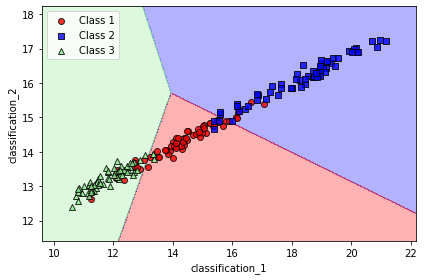

In [95]:
plot_decision_regions(X_train.values[:,:2],y_train.values, classifier=lr)

plt.xlabel('classification_1')
plt.ylabel('classification_2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [96]:
lr = LogisticRegression(multi_class='ovr',random_state=1, solver='lbfgs')
lr.fit(X_test.values[:,:2],y_test.values)

LogisticRegression(multi_class='ovr', random_state=1)

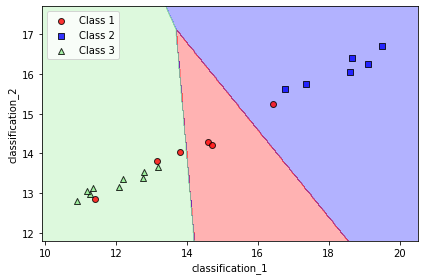

In [97]:
plot_decision_regions(X_test.values[:,:2],y_test.values, classifier=lr)

plt.xlabel('classification_1')
plt.ylabel('classification_2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [100]:
y_pred_orig=lr.predict(X_test.values[:,:2])
accuracy_orig=accuracy_score(y_test, y_pred_orig)
print('Accuracy with imputed data:', accuracy_imputed)
print('Accuracy with original data:', accuracy_orig)

Accuracy with imputed data: 0.8095238095238095
Accuracy with original data: 0.8095238095238095


In [102]:
# get the number of rows and columns of the data
n_rows, n_cols = X.shape
# randomly select 5% of cells and replace with NaN
n_rows, n_cols = X.shape
n_cells = int(n_rows * n_cols * 0.05) # 10% of cells
indices = np.random.choice(n_rows*n_cols, n_cells, replace=False)
row_indices = indices // n_cols
col_indices = indices % n_cols
X.values[row_indices, col_indices] = np.nan
print(X.isna().sum())

Area                        20
Perimeter                   19
Compactness                 25
Length of kernel            17
Width of kernel             22
Asymmetry coefficient       19
Length of kernel groove.    19
dtype: int64


In [103]:
# print the manipulated data
print(X.head(10))

    Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0  15.26      14.84       0.8710             5.763              NaN   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09          NaN             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   
5    NaN      14.21       0.8951               NaN              NaN   
6  14.69      14.49       0.8799             5.563            3.259   
7  14.11      14.10       0.8911             5.420              NaN   
8  16.63      15.46       0.8747             6.053              NaN   
9  16.44      15.25          NaN             5.884            3.505   

   Asymmetry coefficient  Length of kernel groove.  
0                  2.221                     5.220  
1                  1.018                     4.956  
2                  2.699                     4.825  
3     

In [104]:
X_imputed = imputer.fit_transform(X)


print('Number of NaN values before imputation:\n', np.isnan(X).sum())
print('Number of NaN values after imputation:', np.isnan(X_imputed).sum())

print(X_imputed[:10])

Number of NaN values before imputation:
 Area                        20
Perimeter                   19
Compactness                 25
Length of kernel            17
Width of kernel             22
Asymmetry coefficient       19
Length of kernel groove.    19
dtype: int64
Number of NaN values after imputation: 0
[[15.26   14.84    0.871   5.763   3.2065  2.221   5.22  ]
 [14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]
 [14.29   14.09    0.8724  5.291   3.337   2.699   4.825 ]
 [13.84   13.94    0.8955  5.324   3.379   2.259   4.805 ]
 [16.14   14.99    0.9034  5.658   3.562   1.355   5.175 ]
 [14.355  14.21    0.8951  5.52    3.2065  2.462   4.956 ]
 [14.69   14.49    0.8799  5.563   3.259   3.586   5.219 ]
 [14.11   14.1     0.8911  5.42    3.2065  2.7     5.    ]
 [16.63   15.46    0.8747  6.053   3.2065  2.04    5.877 ]
 [16.44   15.25    0.8724  5.884   3.505   1.969   5.224 ]]
